# Prediction task is to determine whether a person makes over 50K a year.
>50K, <=50K.

age: continuous.

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

fnlwgt: continuous.

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th,                10th, Doctorate, 5th-6th, Preschool.

education-num: continuous.

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-               inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

sex: Female, Male.

capital-gain: continuous.

capital-loss: continuous.

hours-per-week: continuous.

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan,     
                Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal,                     Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua,                     Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [1]:
# Set up Notebook

% matplotlib inline

# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We do this to ignore several specific Pandas warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# load data
column_names = ["age","workclass","fnlwgt","education","education-num","marital-status","occupation","relationship"
                ,"race","sex","capital-gain","capital-loss","hours-per-week","native-country","income"]
training_data = pd.read_csv("../data/adult_data.csv",header=None,names=column_names)
testing_data = pd.read_csv("../data/adult_test.csv",header=None,skiprows=1,names=column_names)

In [3]:
training_data.head(10)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [4]:
testing_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


 ## Explore and Clean the data set
Give a breif review of the data: histogram for the continous data and count number for the categorical data feature

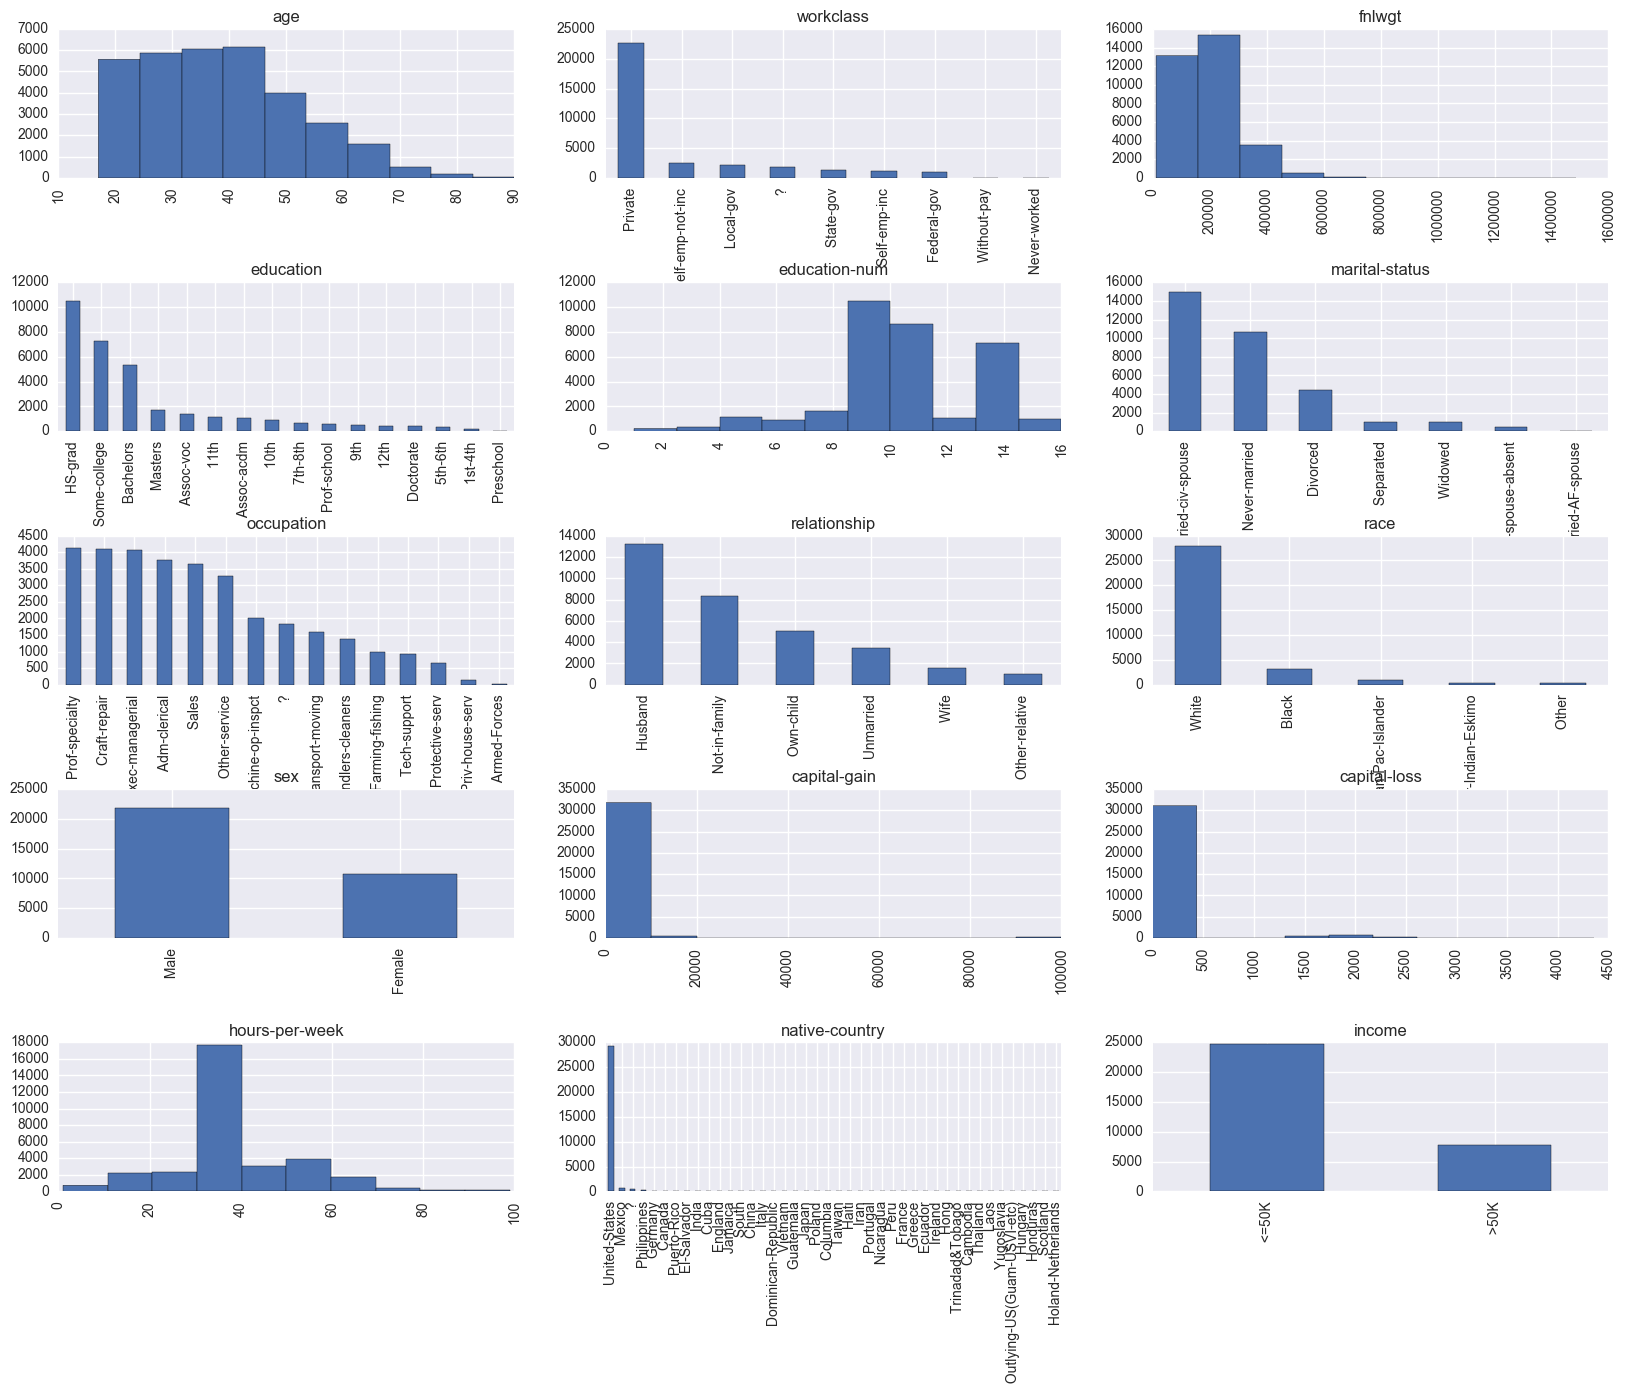

In [7]:
fig = plt.figure(figsize=(20,15))
for i, column in enumerate(column_names):
    ax = fig.add_subplot(5, 3, i + 1)
    ax.set_title(column)
    # categorical data
    if training_data.dtypes[column] == np.object:
        training_data[column].value_counts().plot(kind="bar", axes=ax)
    else:
        training_data[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)

## we can easily identify that there are missing data in the categorical features like "workclass,occupation,native-country" marked with "?" , so we have to deal with these missing data.
### (1)let's look at missing data in workclass 

In [8]:
print(training_data['workclass'].unique())


[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']


In [9]:
# seems like the categorical data set is messing with space at the beginning of the each value, we should clean this
for column in column_names:
    # categorical data
    if (training_data.dtypes[column] == np.object):
        training_data[column] = training_data[column].str.strip()
        # same operation for testing data
        testing_data[column] = testing_data[column].str.strip()
# check if space has been removed
training_data['workclass'].unique()


array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'], dtype=object)

### The category of workclass is pretty diverse, and Private workclass dominates, so I would fit the missing data with Private

In [10]:
training_data.ix[training_data['workclass']=="?", 'workclass'] = "Private"
# same operation for test data 
testing_data.ix[testing_data['workclass']=="?", 'workclass'] = "Private"

In [11]:
training_data['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'], dtype=object)

## (2) let's look at missing data in Occupation

In [12]:
training_data['occupation'].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

### Similarly, the variaty of occupation is very diverse but no occupation is extremely dominants, so we can's decide which category of these missing values should be, just REMOVE them.

In [13]:
training_data = training_data.ix[training_data['occupation']!="?"]
# same operation for test data
testing_data = testing_data.ix[testing_data['occupation']!="?"]

training_data['occupation'].unique()
print("number of rows:{0}".format(training_data.shape[0]))

number of rows:30718


## (3) let's look at missing data in native-coutry

In [14]:
print(training_data['native-country'].unique())
len(training_data[training_data['native-country']=='?'])/training_data.shape[0]

['United-States' 'Cuba' 'Jamaica' 'India' '?' 'Mexico' 'Puerto-Rico'
 'Honduras' 'England' 'Canada' 'Germany' 'Iran' 'Philippines' 'Poland'
 'Columbia' 'Cambodia' 'Thailand' 'Ecuador' 'Laos' 'Taiwan' 'Haiti'
 'Portugal' 'Dominican-Republic' 'El-Salvador' 'France' 'Guatemala' 'Italy'
 'China' 'South' 'Japan' 'Yugoslavia' 'Peru' 'Outlying-US(Guam-USVI-etc)'
 'Scotland' 'Trinadad&Tobago' 'Greece' 'Nicaragua' 'Vietnam' 'Hong'
 'Ireland' 'Hungary' 'Holand-Netherlands']


0.01810013672765154

### apperantly the country category is not sufficient, let's set them as other country

In [15]:
training_data.ix[training_data['native-country']=="?", 'native-country'] = "Other country"
# same operation for test data
testing_data.ix[testing_data['native-country']=="?", 'native-country'] = "Other country"

## Till now, the missing data has been imputed or removed, let explore the correlationship between features. But before that, we should first encode the categoriccal features as numbers using LabelEncoder in preprocessing model

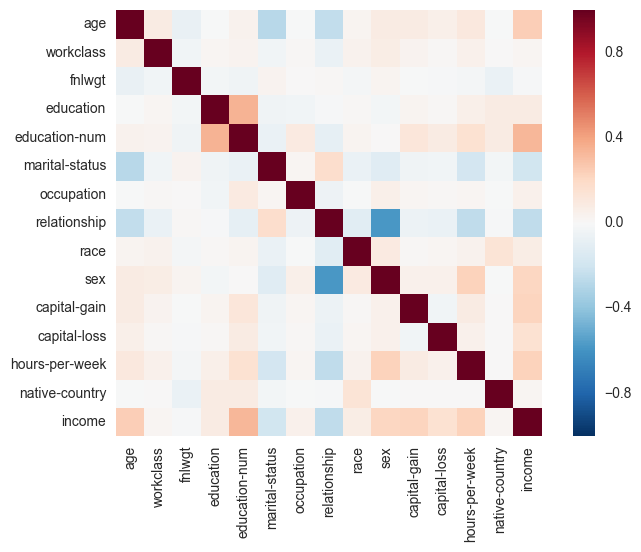

In [16]:
# Encode the categorical features
import sklearn.preprocessing as preprocessing
def encode_features(df):
    result = df.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column])
    return result

# Calculate the correlation and plot it
encoded_training_data = encode_features(training_data)
encoded_testing_data = encode_features(testing_data)
sns.heatmap(encoded_training_data.corr(), square=True)
plt.show()

## it seems like (education, education-num) and (sex, relationship) are positively and negatively correlated respectively. 
### let's look at the (education, education-num)

In [17]:
print(training_data[["education", "education-num"]].head(20))
print(training_data["education"].unique())
print(training_data["education-num"].unique())

       education  education-num
0      Bachelors             13
1      Bachelors             13
2        HS-grad              9
3           11th              7
4      Bachelors             13
5        Masters             14
6            9th              5
7        HS-grad              9
8        Masters             14
9      Bachelors             13
10  Some-college             10
11     Bachelors             13
12     Bachelors             13
13    Assoc-acdm             12
14     Assoc-voc             11
15       7th-8th              4
16       HS-grad              9
17       HS-grad              9
18          11th              7
19       Masters             14
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 'Preschool' '12th' '1st-4th']
[13  9  7 14  5 10 12 11  4 16 15  3  6  1  8  2]


### it seems like these two features actually have the same meaning, which indicate the education level, so we should remove one feature. As the education-num continuously denotes different education level, it is a good feature for income prediction, so we should remove the categorical feature "education".

In [18]:
training_data = training_data.drop('education', axis=1)
testing_data = testing_data.drop('education', axis=1)
training_data.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### let's look at the (sex, relationship)

In [19]:
print(training_data[["sex", "relationship"]].head(20))
print(training_data["sex"].unique())
print(training_data["relationship"].unique())

       sex   relationship
0     Male  Not-in-family
1     Male        Husband
2     Male  Not-in-family
3     Male        Husband
4   Female           Wife
5   Female           Wife
6   Female  Not-in-family
7     Male        Husband
8   Female  Not-in-family
9     Male        Husband
10    Male        Husband
11    Male        Husband
12  Female      Own-child
13    Male  Not-in-family
14    Male        Husband
15    Male        Husband
16    Male      Own-child
17    Male      Unmarried
18    Male        Husband
19  Female      Unmarried
['Male' 'Female']
['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']


### Males  is mostly in the role of husband and female is Wife in "relationship", but there are 4 other categories in the "relationship" which makes this correlation problem tricky. Anyway, just keep both of them at this moment and move on. 

### Noticed that we previously encoded every categorical features into numbers, and those numbers are all continuous numbers, however, those features do not continous relationship between each value. For example, workclass 4 which denotes "Self-emp-not-inc" should not weight greater than workclass 2 which denotes Private occupation. So we should use binary features to better represent those category features.

In [20]:
# extract income labels from encoded data 
training_data_Y = encoded_training_data["income"]
testing_data_Y = encoded_testing_data["income"]


In [21]:
training_data = training_data.drop('income',axis = 1)
testing_data = testing_data.drop('income',axis = 1)

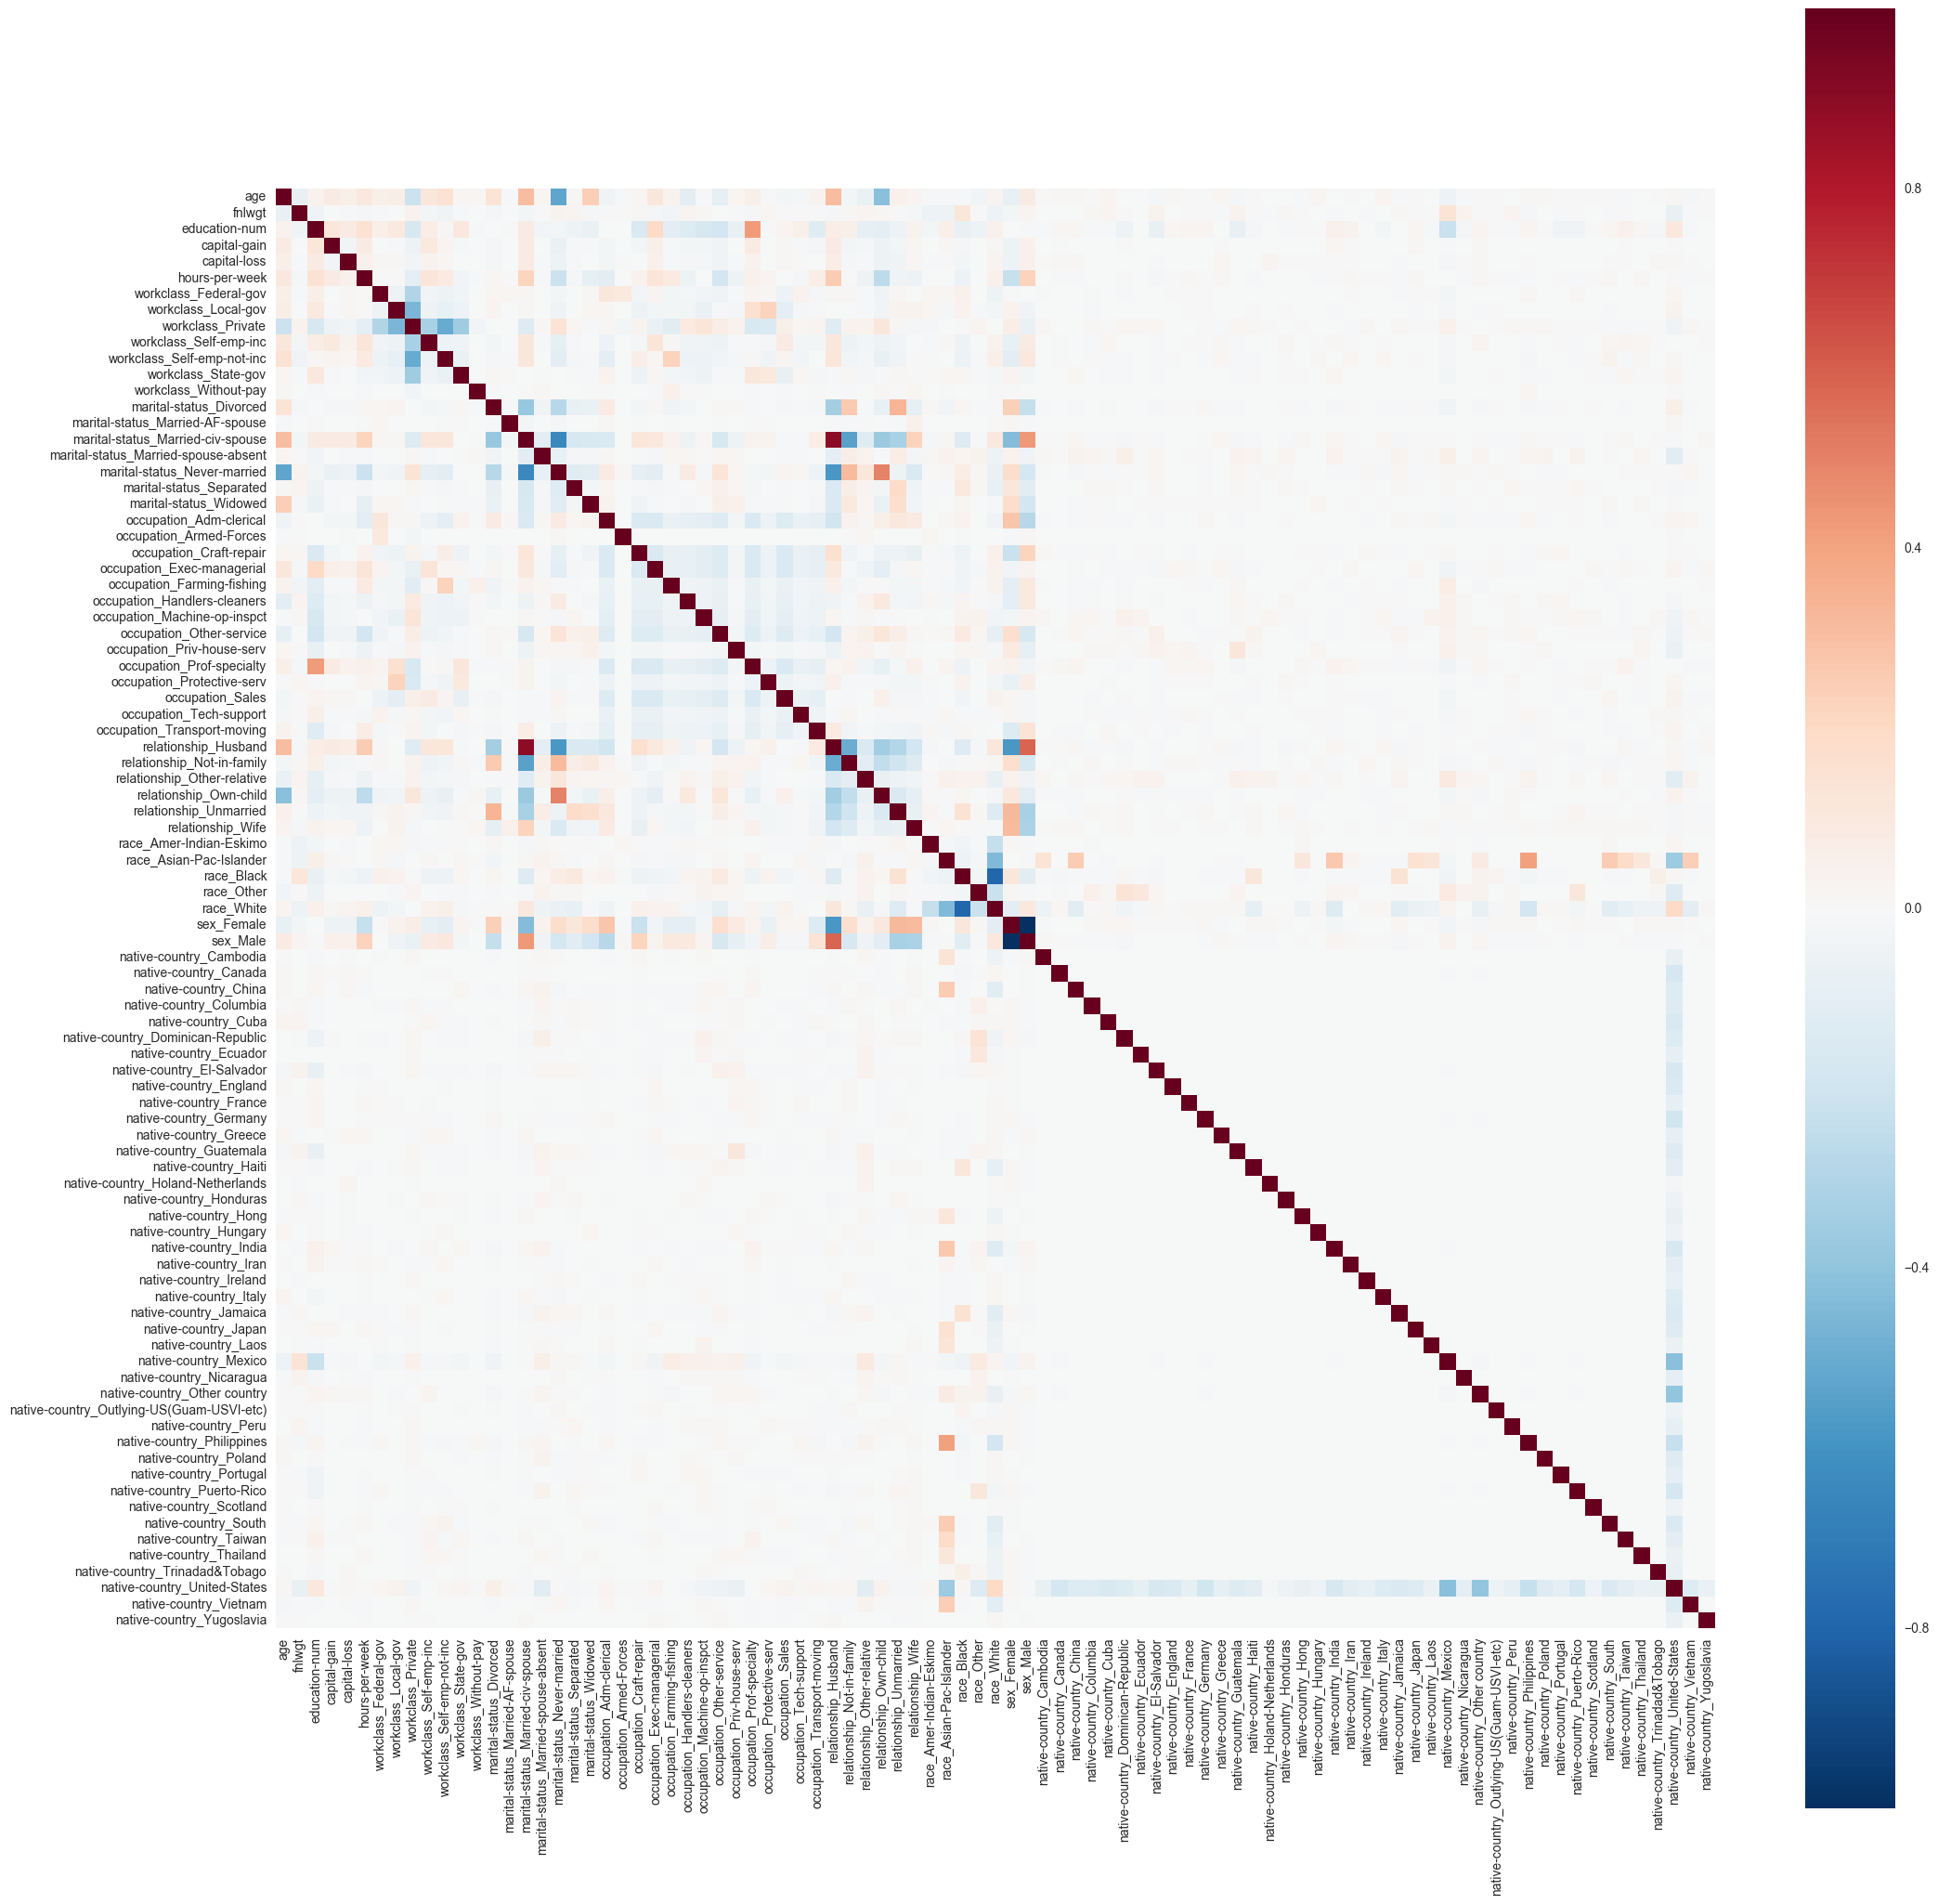

In [22]:
binary_training_data_X = pd.get_dummies(training_data)
binary_testing_data_X = pd.get_dummies(testing_data)

plt.subplots(figsize=(25,25))
sns.heatmap(binary_training_data_X.corr(), square=True)
plt.show()

In [23]:
binary_training_data_X.head()


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,77516,13,2174,0,40,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,50,83311,13,0,0,13,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,38,215646,9,0,0,40,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,53,234721,7,0,0,40,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,28,338409,13,0,0,40,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Before fitting a model, we should scale the feature to help convergence of the technique used for optimization.  

In [24]:
scaler = preprocessing.StandardScaler()
training_data_X = pd.DataFrame(scaler.fit_transform(binary_training_data_X), columns=binary_training_data_X.columns)
testing_data_X = pd.DataFrame(scaler.fit_transform(binary_testing_data_X), columns=binary_testing_data_X.columns)                               
training_data_X.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0.042416,-1.065173,1.119909,0.142438,-0.219179,-0.079207,-0.179611,-0.270403,-1.682028,-0.194165,...,-0.033288,-0.059674,-0.018927,-0.048132,-0.037002,-0.023531,-0.024214,0.341842,-0.045693,-0.022828
1,0.880958,-1.010222,1.119909,-0.147516,-0.219179,-2.331988,-0.179611,-0.270403,-1.682028,-0.194165,...,-0.033288,-0.059674,-0.018927,-0.048132,-0.037002,-0.023531,-0.024214,0.341842,-0.045693,-0.022828
2,-0.033815,0.244655,-0.441111,-0.147516,-0.219179,-0.079207,-0.179611,-0.270403,0.594520,-0.194165,...,-0.033288,-0.059674,-0.018927,-0.048132,-0.037002,-0.023531,-0.024214,0.341842,-0.045693,-0.022828
3,1.109651,0.425535,-1.221621,-0.147516,-0.219179,-0.079207,-0.179611,-0.270403,0.594520,-0.194165,...,-0.033288,-0.059674,-0.018927,-0.048132,-0.037002,-0.023531,-0.024214,0.341842,-0.045693,-0.022828
4,-0.796125,1.408764,1.119909,-0.147516,-0.219179,-0.079207,-0.179611,-0.270403,0.594520,-0.194165,...,-0.033288,-0.059674,-0.018927,-0.048132,-0.037002,-0.023531,-0.024214,-2.925331,-0.045693,-0.022828


In [25]:
print("number of training feature:{0}".format(training_data_X.shape[1]))
print("number of training sample:{0}".format(training_data_X.shape[0]))
print("number of testing feature:{0}".format(testing_data_X.shape[1]))
print("number of testing sample:{0}".format(testing_data_X.shape[0]))

number of training feature:89
number of training sample:30718
number of testing feature:88
number of testing sample:15315


In [26]:
testing_data_X.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,-1.030735,0.351424,-1.217701,-0.145552,-0.218387,-0.078474,-0.178324,-0.270333,0.605137,-0.198221,...,-0.042797,-0.065789,-0.024249,-0.044302,-0.029147,-0.028003,-0.022861,0.332789,-0.035244,-0.021384
1,-0.058575,-0.946946,-0.438659,-0.145552,-0.218387,0.750547,-0.178324,-0.270333,0.605137,-0.198221,...,-0.042797,-0.065789,-0.024249,-0.044302,-0.029147,-0.028003,-0.022861,0.332789,-0.035244,-0.021384
2,-0.806390,1.395415,0.729903,-0.145552,-0.218387,-0.078474,-0.178324,3.699136,-1.652518,-0.198221,...,-0.042797,-0.065789,-0.024249,-0.044302,-0.029147,-0.028003,-0.022861,0.332789,-0.035244,-0.021384
3,0.390114,-0.278663,-0.049138,0.843867,-0.218387,-0.078474,-0.178324,-0.270333,0.605137,-0.198221,...,-0.042797,-0.065789,-0.024249,-0.044302,-0.029147,-0.028003,-0.022861,0.332789,-0.035244,-0.021384
4,-0.357701,0.085008,-1.607221,-0.145552,-0.218387,-0.907495,-0.178324,-0.270333,0.605137,-0.198221,...,-0.042797,-0.065789,-0.024249,-0.044302,-0.029147,-0.028003,-0.022861,0.332789,-0.035244,-0.021384


In [27]:
training_data_X.columns-testing_data_X.columns

Index(['native-country_Holand-Netherlands'], dtype='object')

### seems like there is an outlier

In [28]:
len(training_data[training_data["native-country"]=="Holand-Netherlands"])

1

In [29]:
# there is only one sample with the nvative-country value equals to holad-Netherlands, so remove it!
training_data_X = training_data_X.drop("native-country_Holand-Netherlands",axis=1)

In [30]:
training_data_X.columns-testing_data_X.columns

Index([], dtype='object')

### Save the training data and testing data to files for model training and prediction. In this way, we may re-clean the data to fit model and get better results

In [31]:
training_data_X.to_csv(path_or_buf="../data/training_data_X.csv")

In [32]:
training_data_Y.to_csv(path="../data/training_data_Y.csv")

In [33]:
testing_data_X.to_csv(path_or_buf="../data/testing_data_X.csv")

In [34]:
testing_data_Y.to_csv(path="../data/testing_data_Y.csv")

In [35]:
testing_data_Y.head(10)

0     0
1     0
2     1
3     1
5     0
7     1
8     0
9     0
10    1
11    0
Name: income, dtype: int64